# Exploring High Dimensional Data  
  
You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset. This is the Summary of lecture "Dimensionality Reduction in Python", via datacamp.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
### Removing features without variance
  
A sample of the Pokemon dataset has been loaded as pokemon_df. To get an idea of which features have little variance you should use the IPython Shell to calculate summary statistics on this sample. Then adjust the code to create a smaller, easier to understand, dataset.  
  
---
**A Few Pandas EDA methods/functions**  
- `df.dtypes`: Shows the data type of each column.  
- `df.shape`: It shows the number of dimensions as well as the size in each dimension. Since data frames are two-dimensional, what shape returns is the number of rows and columns.
- `df.size`: Returns the number of rows times the number of columns if DataFrame. Returns the number of rows if Series.
- `df.ndim`: Returns dimension of dataframe/series. 1 for one dimension (series), 2 for two dimensions (dataframe).
- `df.index`: Searches for a given element from the start of the list and returns the lowest index where the element appears.
- `df.columns`: Return the column labels of the dataframe.
- `df.head()`: By default, it returns the first 5 rows of the Dataframe.
- `df.tail()`: By default, it returns the last 5 rows of the Dataframe.
- `df.info()`: This method prints information about a DataFrame including the index dtype and column dtypes, non-null values, and memory usage.
- `df.describe()`: Return a statistical summary for numerical columns present in the dataset. This method calculates some statistical measures like percentile, mean and standard deviation of the numerical values of the Series or DataFrame. We can tell `.describe()` to do non-numeric by passing the `'exclude= 'number'` argument. We'll then get summary statistics adapted to non-numeric data.
- `df.sample()`: Used to generate a sample randomly either row or column.
- `df.isnull().sum()`: Return the number of missing values in each column.
- `df.nunique()`: Return number of unique elements in the object. It is very useful in categorical features especially in cases where we do not know the number of categories beforehand.
- `df.memory_usage()`: Returns how much memory each column uses in bytes.
- `df.dropna()`: Used to remove a row or a column from a dataframe that has a NaN or missing values in it.
- `df.nlargest()`: Returns the first n rows ordered by columns in descending order.
- `df.isna()`: This function returns a dataframe filled with boolean values with true indicating missing values.
- `df.duplicated()`: Returns a boolean Series denoting duplicate rows.  
- `df.column.value_counts()`: Used to get a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently occurring element. It excludes missing values by default. This comes in handy when we want to check the problem of class imbalance for a categorical variable.
- `df.corr()`: Used to find the pairwise correlation of all columns in the dataframe. Any missing values are automatically excluded. For any non-numeric data type columns in the dataframe, it is ignored. This comes in handy while we doing the Feature Selection by observing the correlation between features and target variable or between variables.
- `df.plot(kind= " ")`: Used to create a quick graph of the data, offers all of the standard graphs.


In [2]:
# Load the dataset
pokemon_df = pd.read_csv('../_datasets/pokemon_gen1.csv')
pokemon_df.head()

,HP,Attack,Defense,Generation,Name,Type,Legendary
0,45,49,49,1,Bulbasaur,Grass,False
1,60,62,63,1,Ivysaur,Grass,False
2,80,82,83,1,Venusaur,Grass,False
3,80,100,123,1,VenusaurMega Venusaur,Grass,False
4,39,52,43,1,Charmander,Fire,False


Use the `.describe()` method to find the numeric feature without variance and remove its name from the list assigned to number_cols.

In [3]:
# EDA
pokemon_df.describe()

,HP,Attack,Defense,Generation
count,160.00000,160.00000,160.000000,160.0
mean,64.61250,74.98125,70.175000,1.0
std,27.92127,29.18009,28.883533,0.0
min,10.00000,5.00000,5.000000,1.0
25%,45.00000,52.00000,50.000000,1.0
50%,60.00000,71.00000,65.000000,1.0
75%,80.00000,95.00000,85.000000,1.0
max,250.00000,155.00000,180.000000,1.0


Combine the two lists of feature names to sub-select the chosen features from pokemon_df.

In [4]:
# Remove the feature without variance from this list
number_cols = ['HP', 'Attack', 'Defense']

# Leave this list as is for now
non_number_cols = ['Name', 'Type', 'Legendary']

# Sub-select by combining the lists with chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type  Legendary
0  45      49       49              Bulbasaur  Grass      False
1  60      62       63                Ivysaur  Grass      False
2  80      82       83               Venusaur  Grass      False
3  80     100      123  VenusaurMega Venusaur  Grass      False
4  39      52       43             Charmander   Fire      False


Find the non-numeric feature without variance and remove its name from the list assigned to non_number_cols.

In [5]:
df_selected.info()
df_selected.describe(exclude= ['int64'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HP         160 non-null    int64 
 1   Attack     160 non-null    int64 
 2   Defense    160 non-null    int64 
 3   Name       160 non-null    object
 4   Type       160 non-null    object
 5   Legendary  160 non-null    bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 6.5+ KB


,Name,Type,Legendary
count,160,160,160
unique,160,15,1
top,Bulbasaur,Water,False
freq,1,31,160


All Pokemon in this dataset are non-legendary and from generation one so you could choose to drop those two features.

In [6]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
print(df_selected.head())

   HP  Attack  Defense                   Name   Type
0  45      49       49              Bulbasaur  Grass
1  60      62       63                Ivysaur  Grass
2  80      82       83               Venusaur  Grass
3  80     100      123  VenusaurMega Venusaur  Grass
4  39      52       43             Charmander   Fire


### Feature selection vs feature extraction
  
**Why reduce dimensionality?**  
Your dataset will:  
- Be less complex
- Require less disk space
- Require less computation time
- Have lower chance of model overfitting
  
![Alt text](../_images/feature.png)
  
When we apply **feature selection**, we completely remove a feature and the information it holds from the dataset, such as the yellow column in this example. We try to minimize the information loss by only removing features that are irrelevant or hold little unique information, but this is not always possible.  
  
Compared to feature selection, **feature extraction** is a completely different approach but with the same goal of reducing dimensionality. Instead of selecting a subset of features from our initial dataset, we'll be calculating, or extracting, new features from the original ones. These new features have as little redundant information in them as possible and are therefore fewer in number. One downside is that the newly created features are often less intuitive to understand than the original ones.  
  
The dimensionality of datasets with a lot of strong correlations between the different features in it, can be reduced a lot with feature extraction. Intuitively, this makes sense, if I were to tell you that a person has long feet, long hands, long arms and so on, I could probably just summarize that this person is tall.

### Visually detecting redundant features
  
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

In [7]:
# Load datasets
ansur_df_1 = pd.read_csv('../_datasets/ansur_df_1.csv')
ansur_df_2 = pd.read_csv('../_datasets/ansur_df_2.csv')

print(ansur_df_1.head())
print(ansur_df_2.head())

  Gender  weight_kg  stature_m  body_height
0   Male       81.5      1.776        69.92
1   Male       72.6      1.702        67.01
2   Male       92.9      1.735        68.31
3   Male       79.4      1.655        65.16
4   Male       94.6      1.914        75.35
  Gender  footlength  headlength  n_legs
0   Male         273         206       2
1   Male         263         201       2
2   Male         270         202       2
3   Male         267         199       2
4   Male         305         197       2


Create a pairplot of the ansur_df_1 data sample and color the points using the 'Gender' feature.

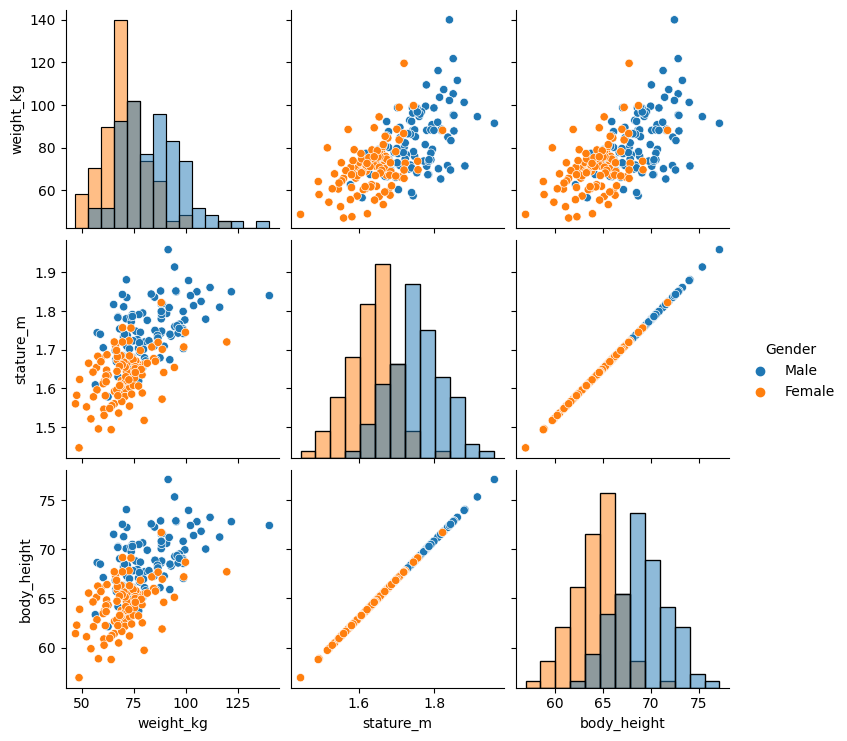

In [8]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue= 'Gender', diag_kind= 'hist')

Two features are basically duplicates, remove one of them from the dataset.

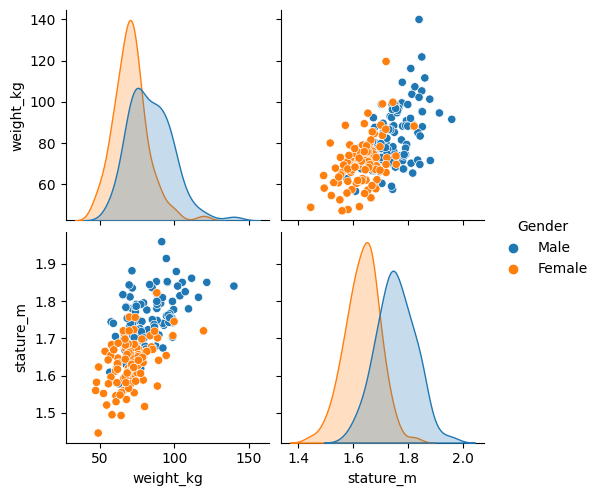

In [9]:
# stature_m and body_height are the two redundant features


# Remove one of the redundant features
reduced_df = ansur_df_1.drop('body_height', axis=1)

# Creat a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

Now create a pairplot of the ansur_df_2 data sample and color the points using the 'Gender' feature.

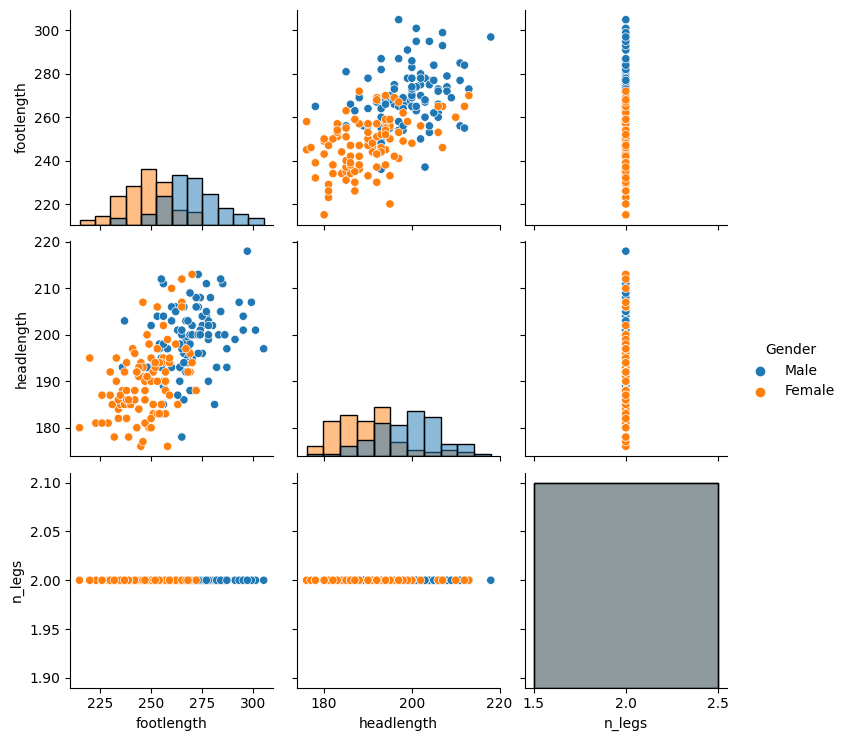

In [10]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

One feature has no variance, remove it from the dataset.

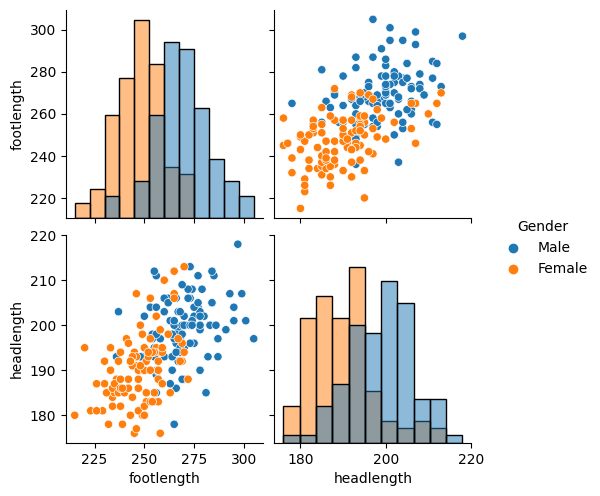

In [11]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop(['n_legs'], axis=1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

Correct, the body height (inches) and stature (meters) hold the same information in a different unit + all the individuals in the second sample have two legs.

## t-SNE visualization of high-dimensional data  
  
`from sklearn.manifold import TSNE`
  
You'll learn to apply t-Distributed Stochastic Neighbor Embedding or t-SNE. t-SNE will maximize the distance in two-dimensional space between observations that are most different in a high-dimensional space. Because of this, observations that are similar will be close to one another and may become clustered. While fitting to the dataset, t-SNE will try different configurations and evaluate these with an internal cost function. High learning rates will cause the algorithm to be more adventurous in the configurations it tries out while low learning rates will cause it to be conservative. Usually, learning rates fall in the 10 to 1000 range.

### Fitting t-SNE to the ANSUR data
  
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to this numeric dataset.

In [12]:
# Load the data
ansur_male = pd.read_csv('../_datasets/ANSUR_II_MALE.csv')
ansur_female = pd.read_csv('../_datasets/ANSUR_II_FEMALE.csv')

# Concat the 2 datasets
df = pd.concat([ansur_male, ansur_female])

# Viewing the count of the unique data types
print(df.select_dtypes(exclude=['number']).columns)

# Listing the non-numeric features
print(df.dtypes.value_counts())

# Displaying the shape
print(df.shape)


Index(['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class'], dtype='object')
int64      91
object      5
float64     3
dtype: int64
(6068, 99)


In [13]:
from sklearn.manifold import TSNE


# Non-numeric columns in the dataset
non_numeric = ['Branch', 'Component', 'Gender', 'BMI_class', 'Height_class']

# Drop the non-numeric columns from df
df_numeric = df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate= 50)

# fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


t-SNE reduced the more than 90 features in the dataset to just 2 which you can now plot.

### t-SNE visualisation of dimensionality
  
Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('x' and 'y') which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

In [14]:
# Selecting all rows for feature 0, selecting all rows for feature 1
# Appending the extracted features to the orginal dataframe 
df['x'] = tsne_features[:, 0]
df['y'] = tsne_features[:, 1]

<Axes: xlabel='x', ylabel='y'>

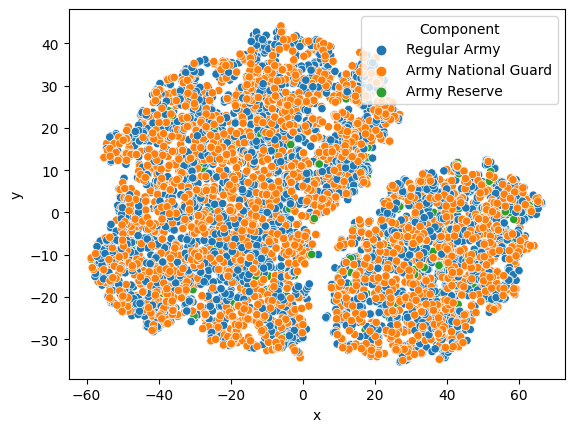

In [15]:
# Color the points according to Army Component
sns.scatterplot(x= 'x', y= 'y', hue= 'Component', data=df)

<Axes: xlabel='x', ylabel='y'>

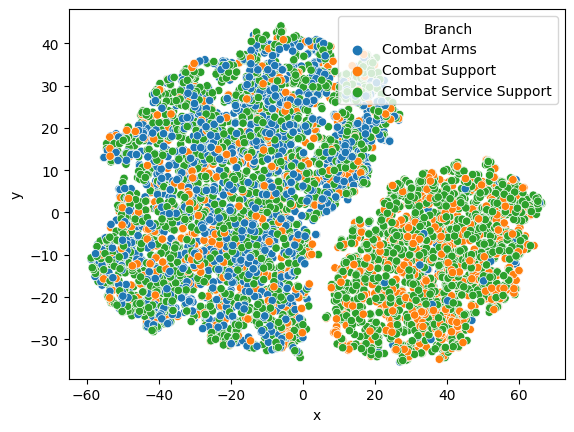

In [16]:
# Color the points by Army Branch
sns.scatterplot(x= 'x', y= 'y', hue= 'Branch', data=df)

<Axes: xlabel='x', ylabel='y'>

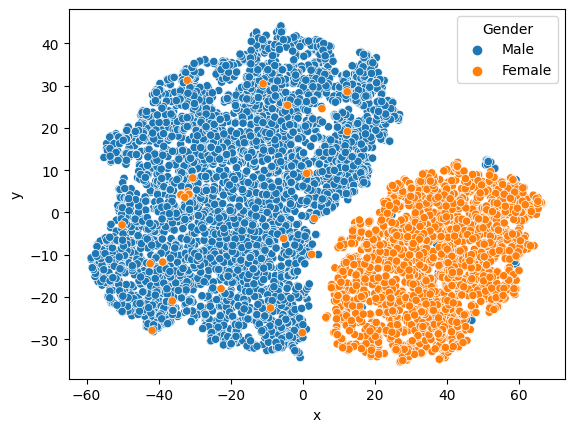

In [17]:
# Color the points by Gender
sns.scatterplot(x= 'x', y= 'y', hue= 'Gender', data= df)

<Axes: xlabel='x', ylabel='y'>

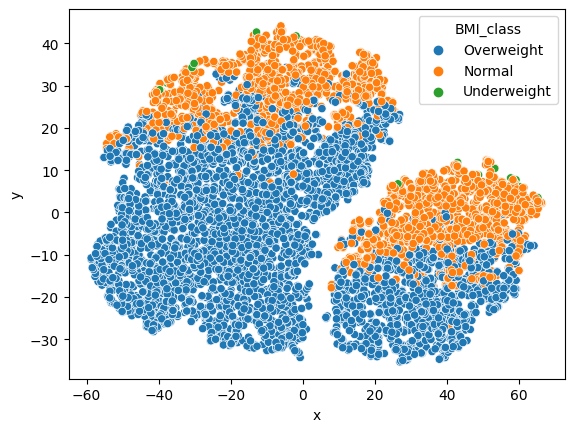

In [18]:
# Color the points by BMI_class
sns.scatterplot(x= 'x', y= 'y', hue= 'BMI_class', data= df)

<Axes: xlabel='x', ylabel='y'>

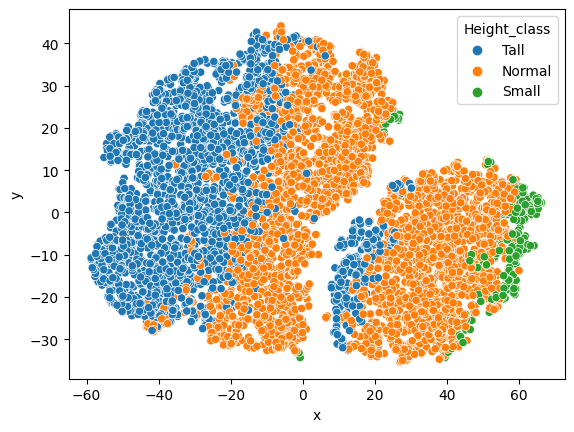

In [19]:
# Color the points by Height_class
sns.scatterplot(x= 'x', y= 'y', hue= 'Height_class', data= df)

There is a Male and a Female cluster. t-SNE found these gender differences in body shape without being told about them explicitly! From the second plot you learned there are more males in the Combat Arms Branch.